## Buscando los mejores parámetros

In [ ]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV

# Leer el archivo CSV
df_to_train = pd.read_csv("../../data/dataset_training.csv")
df_to_train = df_to_train.groupby(['Year', 'Month', 'Day', 'DayOfWeek', 'Quarter'])['TotalSales'].sum().reset_index()
df_to_train['Month_sin'] = np.sin(2 * np.pi * df_to_train['Month'] / 12)
df_to_train['Month_cos'] = np.cos(2 * np.pi * df_to_train['Month'] / 12)
df_to_train['Day_sin'] = np.sin(2 * np.pi * df_to_train['Day'] / 12)
df_to_train['Day_cos'] = np.cos(2 * np.pi * df_to_train['Day'] / 12)

# Datos de entreamiento
X_to_train = df_to_train[['Year', 'Month', 'Day', 'DayOfWeek', 'Quarter', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos']]
Y_to_train = df_to_train['TotalSales']

param_grid = {
  'n_estimators': [100, 300, 500],   # Número de árboles
  'max_depth': [5, 10, 15],          # Profundidad máxima del árbol
  'learning_rate': [0.01, 0.1, 0.2], # Tasa de aprendizaje
  'min_child_weight': [1, 5, 10],    # Peso mínimo para dividir un nodo
  'subsample': [0.8, 1],             # Muestras usadas en cada árbol
  'colsample_bytree': [0.8, 1],      # Fracción de features usadas por árbol
}

grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_to_train, Y_to_train)

print(grid_search.best_params_)
# {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 100, 'subsample': 0.8}

{'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 100, 'subsample': 0.8}


# Mirando análisis de importancia de las variables

/tmp/ipykernel_1739/1709447881.py:10: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_to_train = pd.read_csv("../../data/dataset_training.csv")


<Figure size 800x600 with 0 Axes>

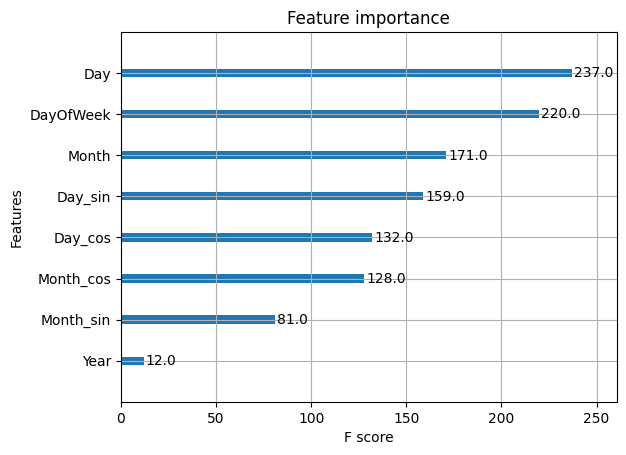

,Year,Month,Day,DayOfWeek,Quarter,TotalSales,Month_sin,Month_cos,Day_sin,Day_cos
0,2010,12,1,2,4,58776.79,-2.449294e-16,1.000000,5.000000e-01,8.660254e-01
1,2010,12,2,3,4,47629.42,-2.449294e-16,1.000000,8.660254e-01,5.000000e-01
2,2010,12,3,4,4,46898.63,-2.449294e-16,1.000000,1.000000e+00,6.123234e-17
3,2010,12,5,6,4,31364.63,-2.449294e-16,1.000000,5.000000e-01,-8.660254e-01
4,2010,12,6,0,4,54624.15,-2.449294e-16,1.000000,1.224647e-16,-1.000000e+00
...,...,...,...,...,...,...,...,...,...,...
272,2011,11,2,2,4,45690.08,-5.000000e-01,0.866025,8.660254e-01,5.000000e-01
273,2011,11,3,3,4,63425.47,-5.000000e-01,0.866025,1.000000e+00,6.123234e-17
274,2011,11,4,4,4,62594.59,-5.000000e-01,0.866025,8.660254e-01,-5.000000e-01
275,2011,11,6,6,4,42513.59,-5.000000e-01,0.866025,1.224647e-16,-1.000000e+00


In [ ]:
# * PAR VER LA IMPORTANCIA DE LAS VARIABLES
from xgboost import plot_importance
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Leer el archivo CSV
df_to_train = pd.read_csv("../../data/dataset_training.csv")
df_to_train = df_to_train.groupby(['Year', 'Month', 'Day', 'DayOfWeek', 'Quarter'])['TotalSales'].sum().reset_index()
df_to_train['Month_sin'] = np.sin(2 * np.pi * df_to_train['Month'] / 12)
df_to_train['Month_cos'] = np.cos(2 * np.pi * df_to_train['Month'] / 12)
df_to_train['Day_sin'] = np.sin(2 * np.pi * df_to_train['Day'] / 12)
df_to_train['Day_cos'] = np.cos(2 * np.pi * df_to_train['Day'] / 12)

# Datos de entreamiento
X_to_train = df_to_train[['Year', 'Month', 'Day', 'DayOfWeek', 'Quarter', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos']]
Y_to_train = df_to_train['TotalSales']


# Configuración del modelo basándome en los best_params
model =  XGBRegressor(
  n_estimators=100,     # Número de árboles
  max_depth=5,          # Profundidad máxima
  learning_rate=0.2,    # Tasa de aprendizaje
  min_child_weight=10,  # Peso mínimo necesario para crear un nodo hijo
  subsample=0.8,        # Fracción de muestras usadas para entrenar
  colsample_bytree=1,   # Fracción de características usadas por árbol
  random_state=42       # Semilla aleatoria
)
model.fit(X_to_train, Y_to_train)

plt.figure(figsize=(8, 6))
plot_importance(model)
plt.show()
df_to_train

/tmp/ipykernel_1739/899003118.py:10: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_to_train = pd.read_csv("../../data/dataset_training.csv")


RMSE: 36765.55
MAE: 23236.62


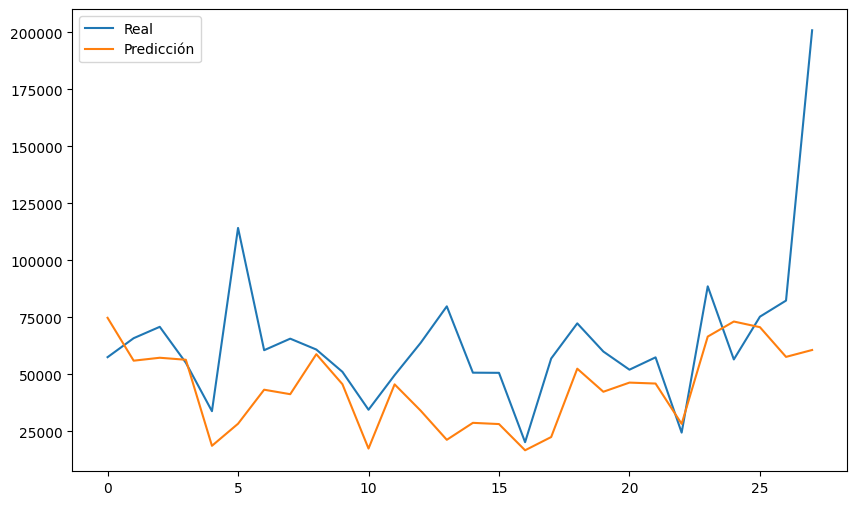

In [4]:
# * PROCESO COMPLETO

from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Leer el archivo CSV
df_to_train = pd.read_csv("../../data/dataset_training.csv")
df_to_train = df_to_train.groupby(['Year', 'Month', 'Day', 'DayOfWeek', 'Quarter'])['TotalSales'].sum().reset_index()
df_to_train['Month_sin'] = np.sin(2 * np.pi * df_to_train['Month'] / 12)
df_to_train['Month_cos'] = np.cos(2 * np.pi * df_to_train['Month'] / 12)
df_to_train['Day_sin'] = np.sin(2 * np.pi * df_to_train['Day'] / 12)
df_to_train['Day_cos'] = np.cos(2 * np.pi * df_to_train['Day'] / 12)

# Datos de entreamiento
X_to_train = df_to_train[['Year', 'Month', 'Day', 'DayOfWeek', 'Quarter', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos']]
Y_to_train = df_to_train['TotalSales']


# fit model
model =  XGBRegressor(
  n_estimators=100,     # Número de árboles
  max_depth=5,          # Profundidad máxima
  learning_rate=0.2,    # Tasa de aprendizaje
  min_child_weight=10,  # Peso mínimo necesario para crear un nodo hijo
  subsample=0.8,        # Fracción de muestras usadas para entrenar
  colsample_bytree=1,   # Fracción de características usadas por árbol
  random_state=42       # Semilla aleatoria
)
model.fit(X_to_train, Y_to_train)

#### **** ---- Probando el modelo ---- **** ####

# Leer el archivo CSV
df_to_test = pd.read_csv("../../data/dataset_prediction.csv")
df_to_test = df_to_test.groupby(['Year', 'Month', 'Day', 'DayOfWeek', 'Quarter'])['TotalSales'].sum().reset_index()
df_to_test['Month_sin'] = np.sin(2 * np.pi * df_to_test['Month'] / 12)
df_to_test['Month_cos'] = np.cos(2 * np.pi * df_to_train['Month'] / 12)
df_to_test['Day_sin'] = np.sin(2 * np.pi * df_to_test['Day'] / 12)
df_to_test['Day_cos'] = np.cos(2 * np.pi * df_to_test['Day'] / 12)

# Datos de testing
X_to_test = df_to_test[['Year', 'Month', 'Day', 'DayOfWeek', 'Quarter', 'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos']]
Y_to_test = df_to_test['TotalSales']


# Hacer predicciones
predictions = model.predict(X_to_test)
#print(predictions)
#print(Y_to_test.values)


rmse = np.sqrt(mean_squared_error(Y_to_test, predictions))
mae = mean_absolute_error(Y_to_test, predictions)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Gráfico de comparación
plt.figure(figsize=(10, 6))
plt.plot(Y_to_test.values, label='Real')
plt.plot(predictions, label='Predicción')
plt.legend()
plt.show()

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


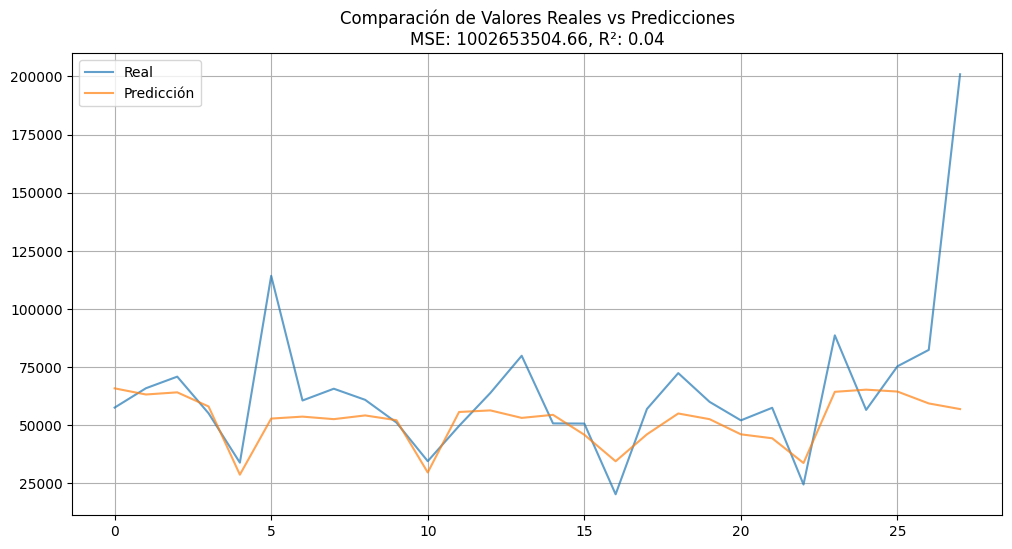


Mejores parámetros encontrados:
{'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.9}

Importancia de características:
           feature  importance
17       Sales_MA7    0.216622
3        DayOfWeek    0.155326
12   DayOfWeek_cos    0.065229
6        DayOfYear    0.061744
18      Sales_MA30    0.060815
9          Day_sin    0.049116
15   DayOfYear_sin    0.043717
16   DayOfYear_cos    0.041705
11   DayOfWeek_sin    0.037626
5       WeekOfYear    0.032690
14  WeekOfYear_cos    0.031535
10         Day_cos    0.031259
2              Day    0.030253
0             Year    0.028292
7        Month_sin    0.024156
13  WeekOfYear_sin    0.023155
1            Month    0.022913
8        Month_cos    0.022059
4          Quarter    0.021787


In [5]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

def prepare_data(df):
    # Características temporales adicionales
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week
    df['DayOfYear'] = df['Date'].dt.dayofyear
    
    # Características cíclicas mejoradas
    for col in ['Month', 'Day', 'DayOfWeek', 'WeekOfYear', 'DayOfYear']:
        max_val = df[col].max()
        df[f'{col}_sin'] = np.sin(2 * np.pi * df[col] / max_val)
        df[f'{col}_cos'] = np.cos(2 * np.pi * df[col] / max_val)
    
    # Lag features para capturar tendencias
    df['Sales_MA7'] = df['TotalSales'].rolling(window=7, min_periods=1).mean()
    df['Sales_MA30'] = df['TotalSales'].rolling(window=30, min_periods=1).mean()
    
    return df

def train_model(df_to_train, df_to_test):
    # Preparar datos
    df_to_train = prepare_data(df_to_train)
    df_to_test = prepare_data(df_to_test)
    
    # Definir características
    feature_columns = ['Year', 'Month', 'Day', 'DayOfWeek', 'Quarter', 'WeekOfYear', 'DayOfYear',
                      'Month_sin', 'Month_cos', 'Day_sin', 'Day_cos', 'DayOfWeek_sin', 'DayOfWeek_cos',
                      'WeekOfYear_sin', 'WeekOfYear_cos', 'DayOfYear_sin', 'DayOfYear_cos',
                      'Sales_MA7', 'Sales_MA30']
    
    # Escalar características
    scaler = StandardScaler()
    X_train = scaler.fit_transform(df_to_train[feature_columns])
    X_test = scaler.transform(df_to_test[feature_columns])
    
    y_train = df_to_train['TotalSales']
    y_test = df_to_test['TotalSales']
    
    # Definir parámetros para búsqueda
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [6, 8, 10],
        'learning_rate': [0.01, 0.05, 0.1],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'gamma': [0, 0.1, 0.2]
    }
    
    # Modelo base
    model = XGBRegressor(random_state=42)
    
    # Búsqueda de hiperparámetros con validación cruzada
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )
    
    # Entrenar modelo
    grid_search.fit(X_train, y_train)
    
    # Obtener mejor modelo
    best_model = grid_search.best_estimator_
    
    # Hacer predicciones
    predictions = best_model.predict(X_test)
    
    # Evaluar modelo
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    # Visualizar resultados
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Real', alpha=0.7)
    plt.plot(predictions, label='Predicción', alpha=0.7)
    plt.title(f'Comparación de Valores Reales vs Predicciones\nMSE: {mse:.2f}, R²: {r2:.2f}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Imprimir importancia de características
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nMejores parámetros encontrados:")
    print(grid_search.best_params_)
    print("\nImportancia de características:")
    print(feature_importance)
    
    return best_model, feature_importance, grid_search.best_params_

# Uso del modelo mejorado
best_model, feature_importance, best_params = train_model(df_to_train, df_to_test)